# This notebook demonstrates effect of Dimensionality reduction on the Efficiency of the in-built classifiers from scikit learn's library  with regards to

(a) Various synthetic dataset.
(b) Range of dimensions after performing dimensionality reduction.

The point of this example is to illustrate the nature of different datasets after dimesnsinality reduction and passig them to different classifiers. This should be taken with a grain of salt, as the intuition conveyed by these examples does not necessarily carry over to real datasets.

Experiments were performed to see effect of reducing dataset dimensions from high dimensional space to a lower dimensions for classification. For Dimensionality reduction, inbuilt algorithm from sklearn were considered. 
For classification pre-established sklearn algorithms are used. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

In [2]:
names = ["KNN","Random Forest", "svm"]
classifiers = [
    KNeighborsClassifier(5),
    RandomForestClassifier(n_estimators=100, bootstrap = True ,max_features = 'sqrt'),
    SVC(kernel="linear", C=0.025)]

Datasets used have 1000 samples and 2 signal dimensions each along with 98 noise dimensions. For generating synthetic noise establish sklearn algorithms were used. 
Noise is a gaussian noise with mean of 0 and variance of 1. 
Noise Dimensions are concatinated to Signal Dimensions to make each dataset of shape (1000,100) 

In [3]:
i = 1
n_samples=1000
n_features=2

Moons = make_moons(n_samples=n_samples, shuffle=True, noise=.05)
df1 = pd.DataFrame(Moons[0],columns=['x'+str(i) for i in range(1,n_features+1)])
Noise_moon = np.random.normal(0, 1,[n_samples, 98])
df_noise1 = (pd.DataFrame(Noise_moon, columns=['dim'+ str(i) for i in range(1,98+1)]))
dataset_noise1 = (pd.concat([df1, df_noise1],axis = 1))
X1 = dataset_noise1.iloc[:, :].values 
X11 = StandardScaler().fit_transform(X1)

Classification = make_classification(n_samples = n_samples, n_features=n_features, n_redundant=0, n_informative=n_features, n_clusters_per_class=1, random_state=8)
df2 = pd.DataFrame(Classification[0],columns=['x'+str(i) for i in range(1,n_features+1)])
Noise_class = np.random.normal(0, 1,[n_samples, 98])
df_noise2 = (pd.DataFrame(Noise_class, columns=['dim'+ str(i) for i in range(1,98+1)]))
dataset_noise2 = (pd.concat([df2, df_noise2],axis = 1))
X2 = dataset_noise2.iloc[:, :].values
X12 = StandardScaler().fit_transform(X2)


Blobs = make_blobs(n_samples=n_samples, centers=n_features, cluster_std=1.0, shuffle=True, random_state=8)
df3 = pd.DataFrame(Blobs[0],columns=['x'+str(i) for i in range(1,n_features+1)])
Noise_blobs = np.random.normal(0, 1,[n_samples, 98])
df_noise3 = (pd.DataFrame(Noise_blobs, columns=['dim'+ str(i) for i in range(1,98+1)]))
dataset_noise3 = (pd.concat([df3, df_noise3],axis = 1))
X3 = dataset_noise3.iloc[:, :].values
X13 = StandardScaler().fit_transform(X3)

dataset = [X11, X12, X13]
labels = [Moons[1], Classification[1], Blobs[1] ]

Xp=dataset
Yp=labels

(1000, 100)
(1000, 100)
(1000, 100)


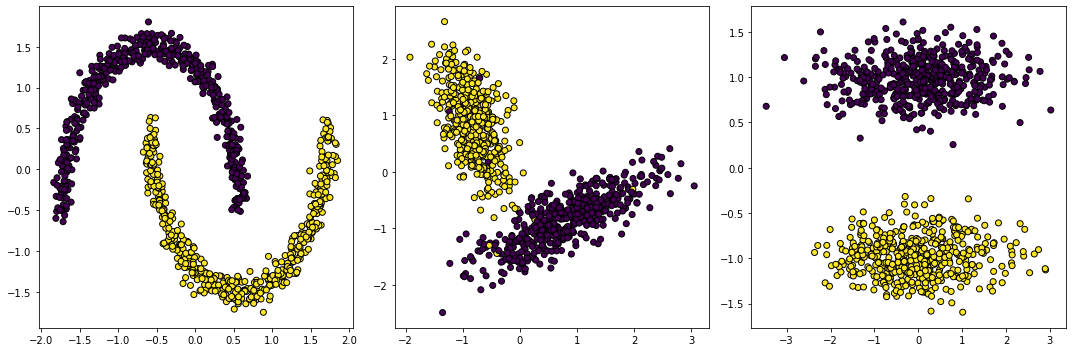

In [4]:

fig1, axs11 = plt.subplots(1, 3, figsize=((15,5)) )
(ax1, ax2, ax3) = axs11
ax1.scatter(Xp[0][:,0], Xp[0][:,1], c= Yp[0], edgecolors='k')
ax2.scatter(Xp[1][:,0], Xp[1][:,1], c= Yp[1], edgecolors='k')
ax3.scatter(Xp[2][:,0], Xp[2][:,1], c= Yp[2], edgecolors='k')

plt.tight_layout()
plt.show()

In [10]:
sim = 2
dim_knn = []
score_knn = []
dim_rf = []
score_rf = []
dim_svm = []
score_svm = []

dknn1 = [] 
drf1 = []
dsvm1 = []
sknn1 = [] 
srf1 = []
ssvm1 = []

dknn2 = [] 
drf2 = []
dsvm2 = []
sknn2 = [] 
srf2 = []
ssvm2 = []

dknn3 = [] 
drf3 = []
dsvm3 = []
sknn3 = [] 
srf3 = []
ssvm3 = []

dim_data1 =[]
dim_data2 =[]
dim_data3 =[]
score_data1 = []
score_data2 = []
score_data3 = []
i= 1
for i in range (sim):
    
    X1=dataset
    Y1=labels
    #Each dataset
    dim_data = []
    score_data = []
    for X, Y in zip(X1,Y1):
        j = 1
        dim_class = []
        score_class = []
        
        #Each classifier
        for name, clf in zip(names, classifiers):
            dim_rep = []
            score_rep = []
            #Each Dimensions
            for j in range (100 , 1 , -1):
                pca = PCA(n_components=j)
                principalComponents = pca.fit_transform(X)
                principalDf = pd.DataFrame(data = principalComponents
                             , columns = ['principal component'+str(i) for k in range(1,1+j)])
                principalDf['y'] = Y

                a = principalDf.iloc[:, :-1].values
                b = principalDf['y']
                X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=.4)

                clf.fit(X_train, y_train)
                score_dim = clf.score(X_test, y_test)
                score_rep.append(score_dim)
                dim_rep.append(j)
                
            dim_class += dim_rep
            score_class += score_rep 
            
                
        dim_data += dim_class
        score_data += score_class
        
        
    dim_data1 += dim_data[0:297]
    score_data1 += score_data[0:297]
    dknn1 += dim_data1[(0 * (i+1)):(99 * (i+1))]
    sknn1 += score_data1[(0 * (i+1)):(99 * (i+1))] 
    drf1 += dim_data1[(99 * (i+1)):(198 * (i+1))]
    srf1 += score_data1[(99 * (i+1)):(198 * (i+1))] 
    dsvm1 += dim_data1[(198 * (i+1)):(297 * (i+1))]
    ssvm1 += score_data1[(198 * (i+1)):(297 * (i+1))]
    

    dim_data2 += dim_data[297:594]
    score_data2 += score_data[297:594]
    dknn2 += dim_data2[(0 * (i+1)):(99 * (i+1))]
    sknn2 += score_data2[(0 * (i+1)):(99 * (i+1))] 
    drf2 += dim_data2[(99 * (i+1)):(198 * (i+1))]
    srf2 += score_data2[(99 * (i+1)):(198 * (i+1))] 
    dsvm2 += dim_data2[(198 * (i+1)):(297 * (i+1))]
    ssvm2 += score_data2[(198 * (i+1)):(297 * (i+1))]
    
    dim_data3 += dim_data[594:891]
    score_data3 += score_data[594:891]
    dknn3 += dim_data3[(0 * (i+1)):(99 * (i+1))]
    sknn3 += score_data3[(0 * (i+1)):(99 * (i+1))] 
    drf3 += dim_data3[(99 * (i+1)):(198 * (i+1))]
    srf3 += score_data3[(99 * (i+1)):(198 * (i+1))] 
    dsvm3 += dim_data3[(198 * (i+1)):(297 * (i+1))]
    ssvm3 += score_data3[(198 * (i+1)):(297 * (i+1))]
    

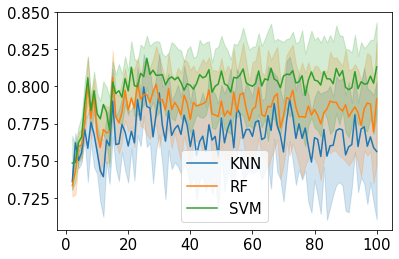

In [11]:
event=[]
for i in range(0,len(dknn1)):
    event.append('KNN')
for j in range(0,len(drf1)):
    event.append('RF')
for k in range(0,len(dsvm1)):
    event.append('SVM')
    
dims=np.concatenate((dknn1,drf1,dsvm1))
scores=np.concatenate((sknn1,srf1,ssvm1))

data={'Number of Noise Dimensions':dims,'Acc':scores,'Event':event}
sns.lineplot(x='Number of Noise Dimensions',y='Acc',hue='Event',data=data) 

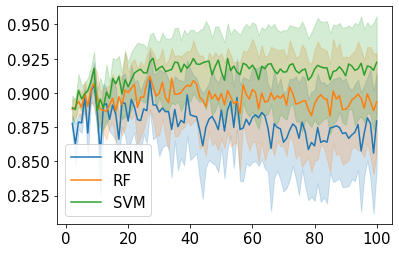

In [12]:
event2=[]
for i in range(0,len(dknn2)):
    event2.append('KNN')
for j in range(0,len(drf2)):
    event2.append('RF')
for k in range(0,len(dsvm2)):
    event2.append('SVM')
    
dims2=np.concatenate((dknn2,drf2,dsvm2))
scores2=np.concatenate((sknn2,srf2,ssvm2))

data2={'Number of Noise Dimensions':dims2,'Acc':scores2,'Event':event2}
sns.lineplot(x='Number of Noise Dimensions',y='Acc',hue='Event',data=data2) 

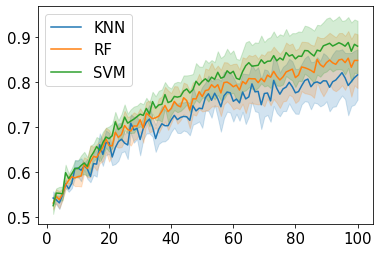

In [13]:
event3=[]
for i in range(0,len(dknn3)):
    event3.append('KNN')
for j in range(0,len(drf3)):
    event3.append('RF')
for k in range(0,len(dsvm3)):
    event3.append('SVM')
    
dims3=np.concatenate((dknn3,drf3,dsvm3))
scores3=np.concatenate((sknn3,srf3,ssvm3))

data3={'Number of Noise Dimensions':dims3,'Acc':scores3,'Event':event3}
sns.lineplot(x='Number of Noise Dimensions',y='Acc',hue='Event',data=data3) 

# Inference :
In the plot we can see different trends with respect to the different shapes of the dataset.  
In case of Blobs, Number of dimensions help in clasification of the dataset. As we try to reduce dimensions, Accuracy of the classification for classifiers decresses steadyly. 
In case of Moons and Classification_dataset, there is not much change in accuracy of the classiers till a particular dimentional threshould. After that a considerable spike is observed indicating exponential cahnges in the accuracy of the classifiers. 


Text(0.0, 0.5, 'Accuracy')

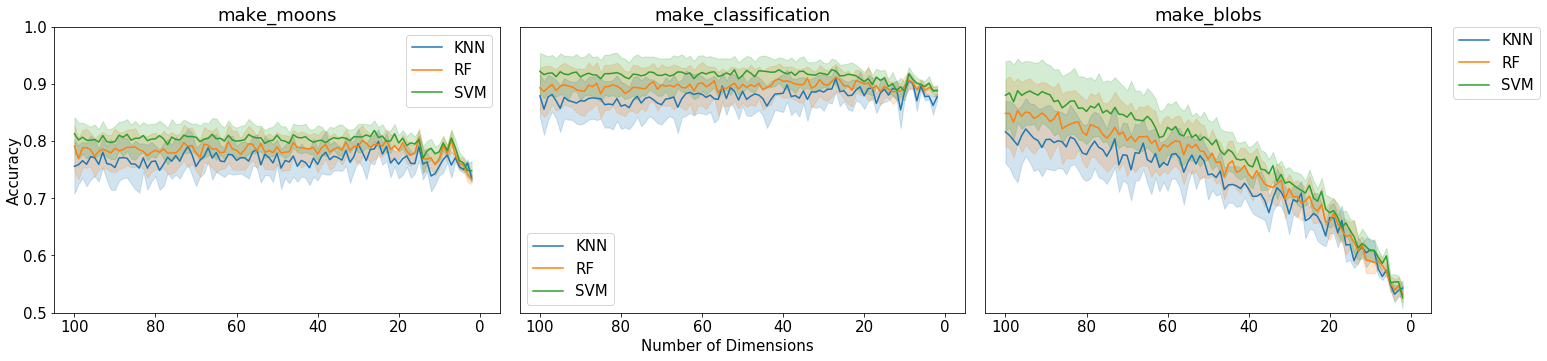

In [14]:
plt.rcParams.update({'font.size':15})
fig,ax=plt.subplots(1,3,figsize=(20,5),sharex=True,sharey=True)
plt.subplot(1,3,1)
plt.ylim(0.5,1)
plt.xlim(105,-5)
plt.title('make_moons')
ax1=sns.lineplot(x='Number of Noise Dimensions',y='Acc',hue='Event',data=data) 
#ax1.legend_remove()
plt.subplot(1,3,2)
plt.ylim(0.5,1)
plt.xlim(105,-5)
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.title('make_classification')
ax2=sns.lineplot(x='Number of Noise Dimensions',y='Acc',hue='Event',data=data2)
#ax2.legend_remove()
plt.subplot(1,3,3)
plt.ylim(0.5,1)
plt.xlim(105,-5)
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.title('make_blobs')
ax3=sns.lineplot(x='Number of Noise Dimensions',y='Acc',hue='Event',data=data3) 
plt.tight_layout()


plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)
fig.text(0.5, 0.00, 'Number of Dimensions', ha='center')
fig.text(0.00, 0.5, 'Accuracy', va='center', rotation='vertical')
